# 원형 차트

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

In [2]:
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'], columns=ds['feature_names'])
    code_species_map = dict(zip(range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df

df = get_iris_df()

### 모든 시각화는 같은 정보를 어떻게 하면 더 쉽게 이해할 수 있을까?라는 고민의 결과이다.

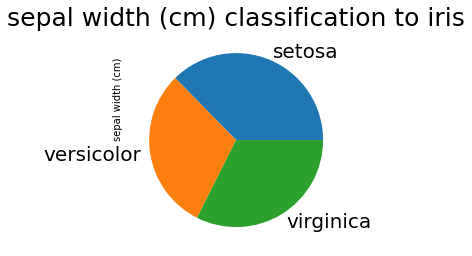

In [3]:
sums_by_species = df.groupby('species').sum()
var = "sepal width (cm)"
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title(var+" classification to iris", fontsize=25)
plt.savefig('iris_pie_for_one_variable.png')
plt.show()
plt.close()

In [4]:
sums_by_species

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


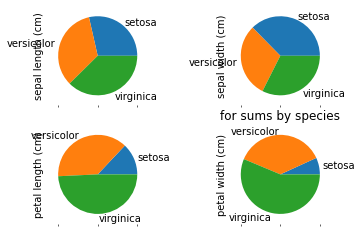

In [5]:
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True, layout=(-1,2), legend=False)
plt.title('for sums by species')
plt.savefig('iris_pie_for_each_variable.png')
plt.show()
plt.close()

# 막대 그래프

#### 상대적인 크기를 쉽게 비교할 수가 있음.

In [6]:
sums_by_species = df.groupby('species').sum()

In [7]:
sums_by_species

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


# matplotlib에서 한글 폰트 나오게 하기

> 출처 : https://data-science-hi.tistory.com/111

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


font_path = r'D:/font/NanumBarunpenB.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

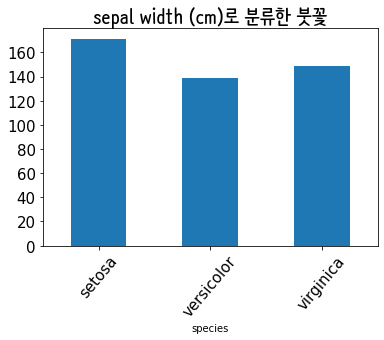

In [9]:
var = "sepal width (cm)"
sums_by_species[var].plot(kind='bar', fontsize=15, rot=50) # rot은 각 항목 이름의 글자회전 인것 같다.

plt.title(var+"로 분류한 붓꽃", fontsize=20, fontproperties=fontprop)
plt.savefig('iris_bar_for_one_variable.png')
plt.show()
plt.close()

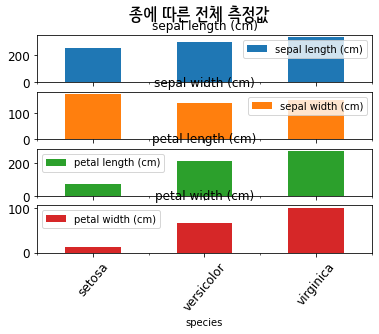

In [10]:
sums_by_species.plot(kind='bar', subplots=True, fontsize=12, rot = 50)
plt.suptitle('종에 따른 전체 측정값', fontproperties=fontprop)
plt.savefig('iris_bar_for_each_variable.png')
plt.show()
plt.close()

# 히스토그램

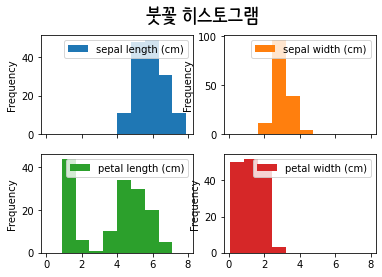

In [11]:
df.plot(kind='hist', subplots=True, layout=(2, 2))
plt.suptitle('붓꽃 히스토그램', fontsize=20, fontproperties=fontprop)
plt.show()

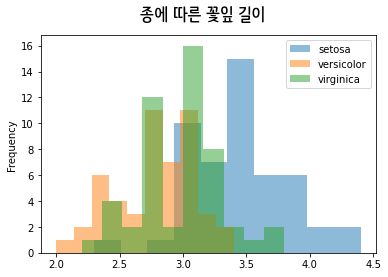

In [12]:
for spec in df['species'].unique():
    forspec = df[df['species']==spec]
    forspec[var].plot(kind='hist', alpha=0.5, label=spec)
    
plt.legend(loc='upper right')
plt.suptitle('종에 따른 꽃잎 길이', fontproperties=fontprop)
plt.savefig('iris_hist_by_spec')
plt.show()

# 상자 그림

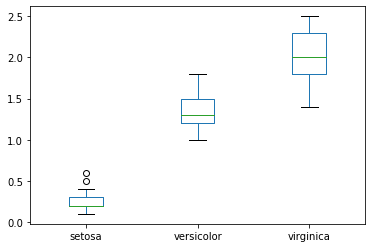

In [13]:
df['ind'] = pd.Series(df.index).apply(lambda i : i % 50)
df.pivot('ind', 'species')['petal width (cm)'].plot(kind='box')
plt.show()

# 산포도

Text(0.5, 1.0, '길이 대 너비')

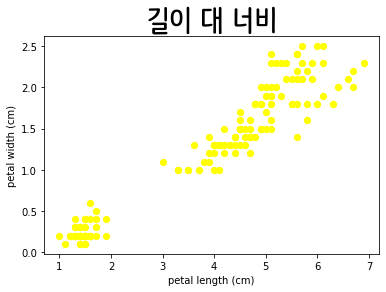

In [14]:
df.plot(kind='scatter',
       x='petal length (cm)', y='petal width (cm)', c="#FFFF00", s=39)
plt.title("길이 대 너비", fontsize = 30, fontproperties=fontprop)

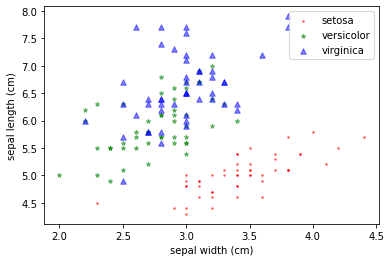

In [15]:
plt.close()
colors = ["r", "g", "b"]
markers = [".", "*", "^"]
fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique()):
    ddf = df[df['species']==spec]
    ddf.plot(kind='scatter',
            x="sepal width (cm)", y='sepal length (cm)', alpha=0.5, s=10*(i+1), ax=ax, color=colors[i],
            marker=markers[i], label=spec)

    
    
plt.legend()
plt.show()

In [17]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 산포도와 로그축

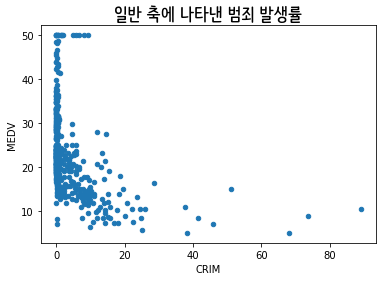

In [20]:
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt

# 팬더스 데이터 프레임 생성
bs = ds.load_boston() # 보스턴 주택 가격예측 데이터셋 가져오기
df = pd.DataFrame(bs.data, columns=bs.feature_names)
df['MEDV'] = bs.target

# 일반적인 산포도
df.plot(x='CRIM', y='MEDV', kind='scatter')
plt.title('일반 축에 나타낸 범죄 발생률', fontproperties=fontprop)
plt.show()

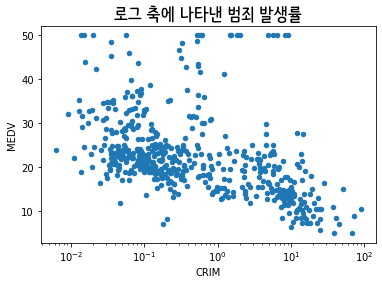

In [21]:
df.plot(x='CRIM', y='MEDV', kind='scatter', logx=True)
plt.title('로그 축에 나타낸 범죄 발생률', fontproperties=fontprop)
plt.show()

# 산포 행렬
#### 산포도는 단 두 종류의 변수만 시각화하기에 산포도를 여러개 그려서 많은 변수를 비교하는 것이 산포 행렬이다.

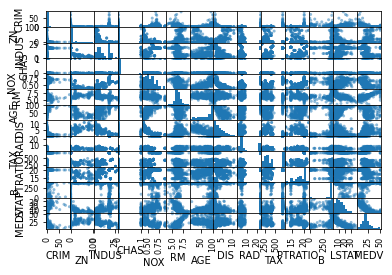

In [23]:
plt.close()
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

# 히트맵

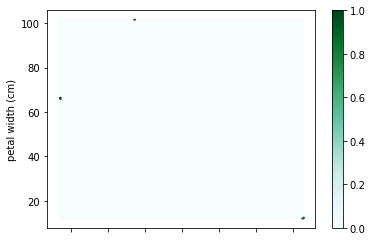

In [25]:
plt.close()
sums_by_species.plot(kind="hexbin", x=var, y='petal width (cm)')
plt.show()

# 상관관계

* 피어슨 상관관계
> 두 변수의 관계를 1차 함수로 설명하는 방법으로 1차 함수라는 특수한 형태이기 때문에 X가 증가하면 Y도 증가한다고 반드시 상관계수가 1이 되지는 않는다.

* 순서형 상관관계
> 단순히 X가 증가하면 Y도 증가하는지 여부에만 집중한다. 예를 들어 사람의 키와 몸무게를 따질때 두 순서로 정렬한 것이 얼마나 비슷한지 따진다.

In [26]:
sums_by_species["sepal length (cm)"].corr(sums_by_species['sepal width (cm)']) # 피어슨 상관괸계

-0.745074584661143

## 두 변수의 상관관계가 높아도 둘이 서로의 원인이 아니다.

#### 케디의 법칙 
> A와 B의 상관관계가 높으면 대체로 둘 중 하나가 다른 원인이 아니라 어떤 공통의 외부요인 C가 존재한다.

# 그러므로 C를 찾아보도록 하자!!







# 시계열 데이터

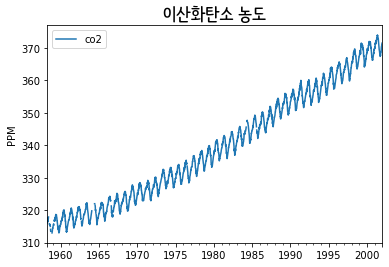

In [27]:
import statsmodels.api as sm

dta = sm.datasets.co2.load_pandas().data
dta.plot()
plt.title("이산화탄소 농도", fontproperties=fontprop)
plt.ylabel("PPM")
plt.show()